In [1]:
# Data handling and manipulation library
import pandas as pd
# Data visualization library based on matplotlib
import seaborn as sns
# Basic plotting library in Python
import matplotlib.pyplot as plt
# Cross-validation function to evaluate model performance
from sklearn.model_selection import cross_val_score
# Library for numerical operations in Python
import numpy as np
# Preprocessing tool to standardize features (mean=0, variance=1)
from sklearn.preprocessing import StandardScaler
# Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA
# Visualization tool for the elbow method to determine the optimal number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
# Calculates the Silhouette Score which measures the quality of clusters
from sklearn.metrics import silhouette_score
# KMeans clustering algorithm
from sklearn.cluster import KMeans
# Library for interactive plotting 
import plotly
# Module for creating various chart types (like scatter plots)
import plotly.graph_objects as go
# Simplified module for creating visualizations in Plotly
import plotly.express as px
# k-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
# Splits data into random train and test subsets
from sklearn.model_selection import train_test_split
# Generates a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Data Preperation and Cleaning

### Import the 'descriptives' dataset
we will work on the descriptives dataset for this exercise.

First we will import the csv-file.
Secoundly, we will drop the columns that we will not utilize for this exercise. (IMPORTANT: these columns might be useful for your projects)
Lastly, the dataset will be transformed into numeric values.

In [2]:
df = pd.read_csv('descriptives.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    271 non-null    object 
 1   name                          76 non-null     object 
 2   gender                        300 non-null    object 
 3   age                           300 non-null    int64  
 4   ethnicity                     300 non-null    object 
 5   country_of_birth              300 non-null    object 
 6   current_country_of_residence  300 non-null    object 
 7   weight                        299 non-null    object 
 8   height                        299 non-null    object 
 9   bmi                           299 non-null    float64
 10  average_daily_step_count      300 non-null    int64  
 11  average_sleep_duration        85 non-null     float64
 12  resting_heart_rate            300 non-null    int64  
 13  heart

In [3]:
df.drop(['health_related_activities','name','patient_id','activities','average_sleep_duration',
        'systolic','diastolic','conversation_id','current_country_of_residence','drug_usage'], axis=1, inplace=True)

In [4]:
# Convert the 'gender' column to binary: Male as 1 and Female as 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Use LabelEncoder to convert 'ethnicity' to numerical labels
labelencoder = LabelEncoder()
df['ethnicity'] = labelencoder.fit_transform(df['ethnicity'])


# Use LabelEncoder to convert 'country_of_birth' to numerical labels
df['country_of_birth'] = labelencoder.fit_transform(df['country_of_birth'])

# Convert 'smoking_status' to boolean and then to integer (True as 1 and False as 0)
df['smoking_status'] = df['smoking_status'].astype(bool)
df['smoking_status'] = df['smoking_status'].astype(int)

# Remove missing values in 'height' and remove ' cm' suffix, then convert to integer
df.dropna(subset=['height'], inplace=True)
df['height'] = df['height'].str.replace(' cm', '')
df['height'] = df['height'].astype(int)

# Remove ' kg' suffix from 'weight' and convert to float
df['weight'] = df['weight'].str.replace(' kg', '')
df['weight'] = df['weight'].astype(float)

# Use LabelEncoder to convert other columns to numerical labels
# These columns include 'diet_type', 'specific_preferences', 'challenges', etc.
df['diet_type'] = labelencoder.fit_transform(df['diet_type'])

df['specific_preferences'] = labelencoder.fit_transform(df['specific_preferences'])

df['challenges'] = labelencoder.fit_transform(df['challenges'])

df['mother'] = labelencoder.fit_transform(df['mother'])

df['father'] = labelencoder.fit_transform(df['father'])

df['current_city_of_residence'] = labelencoder.fit_transform(df['current_city_of_residence'])

df['state_name'] = labelencoder.fit_transform(df['state_name'])

df['state_code'] = labelencoder.fit_transform(df['state_code'])

df['housing_type'] = labelencoder.fit_transform(df['housing_type'])

df['housing_tenure'] = labelencoder.fit_transform(df['housing_tenure'])

df['marital_status'] = labelencoder.fit_transform(df['marital_status'])

df['sexual_orientation'] = labelencoder.fit_transform(df['sexual_orientation'])

df['average_blood_pressure'] = labelencoder.fit_transform(df['average_blood_pressure'])

# Create dictionaries to map custom ordered categorical data to numerical values
alcohol_consumption_order = {'Low': 0, 'Moderate': 1}
stress_level_order = {'Low': 0, 'Moderate': 1}
physical_activity_order = {'Moderate': 0, 'High': 1}

# Map the ordered categorical data to numerical data using the created dictionaries
df['alcohol_consumption'] = df['alcohol_consumption'].map(alcohol_consumption_order)
df['stress_level'] = df['stress_level'].map(stress_level_order)
df['physical_activity'] = df['physical_activity'].map(physical_activity_order)

# replace NAN values in all non binary columns with mean
non_binary_cols = []
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) > 2:
        non_binary_cols.append(col)

# Fill NaN values only for non-binary columns with their respective mean values
df[non_binary_cols] = df[non_binary_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 299
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        297 non-null    int64  
 1   age                           297 non-null    int64  
 2   ethnicity                     297 non-null    int32  
 3   country_of_birth              297 non-null    int32  
 4   weight                        297 non-null    float64
 5   height                        297 non-null    int32  
 6   bmi                           297 non-null    float64
 7   average_daily_step_count      297 non-null    int64  
 8   resting_heart_rate            297 non-null    int64  
 9   heart_rate_variability        297 non-null    float64
 10  average_blood_glucose         297 non-null    float64
 11  average_fasting_glucose       297 non-null    float64
 12  diet_type                     297 non-null    int32  
 13  speci

# Correlation Matrix

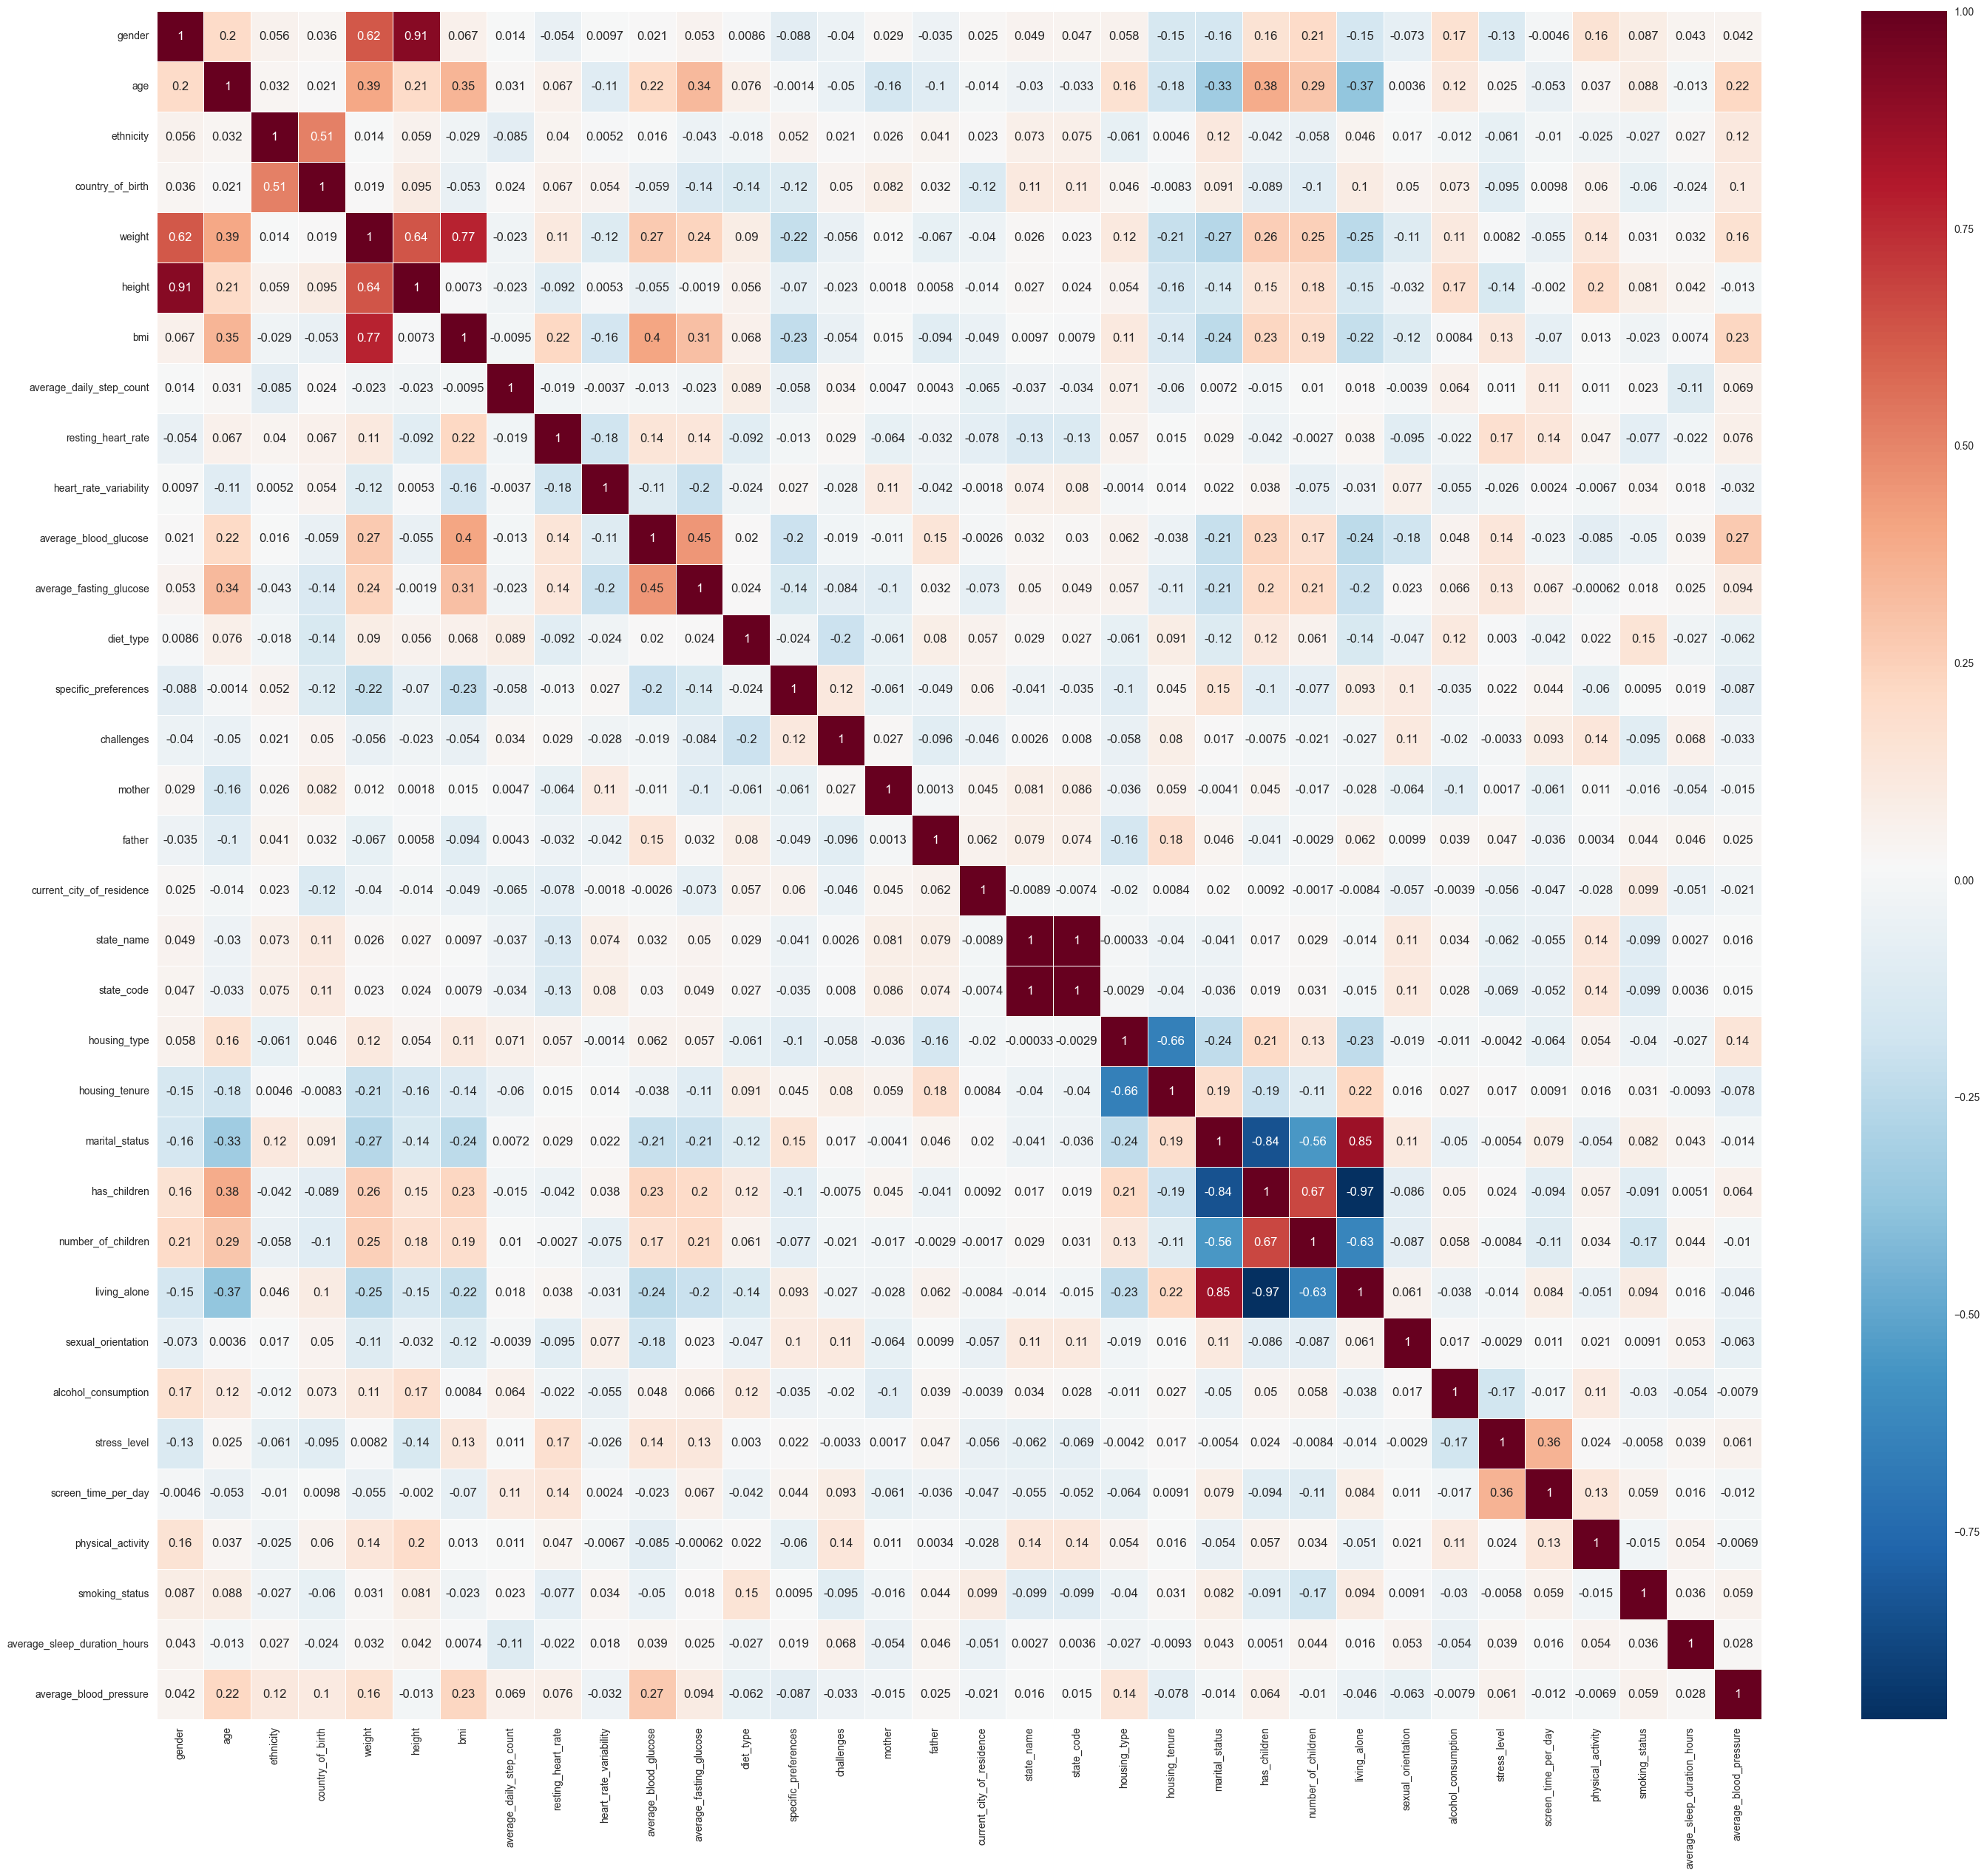

In [6]:
# Compute the pairwise Pearson correlation matrix for df.
# The Pearson correlation coefficient measures the linear relationship between two variables.
# Its value ranges from -1 to 1, where:
# - 1 implies a perfect positive linear relationship,
# - -1 implies a perfect negative linear relationship, and
# - 0 implies no linear relationship.
corr = df.corr(method='pearson')

# Create a new figure and axis with a specified size.
# Adjust the figsize values to change the size of each cell in the heatmap.
fig, ax = plt.subplots(figsize=(35, 30))

# Create a heatmap using Seaborn.
# - `corr`: The computed correlation matrix.
# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

# Display the plot.
plt.show()


### Applying feature scaling to the independent variables (this is prep for Factor Analysis, Classification, and Clustering Exercises):

 We do this to center the data around zero and constrain the variation along basis dimension to obtain similarity.

In [7]:
# Initialize the StandardScaler object
# StandardScaler standardizes the dataset by setting the mean to 0 and variance to 1
scaler = StandardScaler()

# Create a list of all column names in the DataFrame for later use
column_list = df.columns.tolist()

# Fit and transform the DataFrame using StandardScaler
# The output will be a NumPy array of scaled features
df_scaled = scaler.fit_transform(df)

# Convert the NumPy array back to a DataFrame and use original column names
# Now df_scaled contains the scaled features of the original DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=column_list)
df_scaled

,gender,age,ethnicity,country_of_birth,weight,height,bmi,average_daily_step_count,resting_heart_rate,heart_rate_variability,...,number_of_children,living_alone,sexual_orientation,alcohol_consumption,stress_level,screen_time_per_day,physical_activity,smoking_status,average_sleep_duration_hours,average_blood_pressure
0,-0.950708,1.072028,-1.159263,-1.452173,-0.118282,-0.669736,0.440186,0.276544,1.135781,-1.458221,...,-2.071168e+00,1.141195,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,0.004019,1.974136
1,-0.950708,-0.729931,-0.547571,-0.924859,-0.868279,-0.669736,-0.625977,-0.107627,-1.026572,-0.165024,...,-6.568752e-01,-0.876275,0.110341,-0.359552,0.931625,-0.004887,-0.186663,-0.082339,-0.739258,-0.539555
2,-0.950708,-1.284381,0.879711,0.369459,-0.618280,-0.669736,-0.262947,0.269011,-0.305787,-1.070262,...,-2.071168e+00,1.141195,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,-0.739258,-0.539555
3,-0.950708,1.072028,0.227239,-0.157855,-0.618280,-1.331011,0.317902,0.306675,-0.666179,0.481574,...,7.574173e-01,-0.876275,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,0.004019,1.974136
4,-0.950708,-0.314095,-1.363160,-1.595986,-0.618280,-1.331011,0.321723,0.269011,1.856566,0.352255,...,7.574173e-01,-0.876275,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,-1.707770,-0.539555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-0.950708,1.072028,-1.648616,1.615839,-0.268282,-0.669736,0.207082,0.295376,-1.026572,0.869533,...,7.574173e-01,-0.876275,0.110341,-0.359552,-1.073394,-1.456242,-0.186663,-0.082339,0.229255,-0.539555
293,-0.950708,-0.729931,-1.200042,1.567902,-0.618280,-0.669736,-0.262947,-0.359975,-0.305787,0.093615,...,-3.140360e-16,1.141195,2.224608,-0.359552,0.931625,1.446469,-0.186663,-0.082339,0.874930,-0.539555
294,-0.950708,-0.314095,-0.833027,-1.116609,-1.118278,-0.669736,-0.962258,0.284077,-0.485983,1.128173,...,7.574173e-01,-0.876275,0.110341,-0.359552,0.931625,-0.004887,-0.186663,-0.082339,1.197767,-0.539555
295,-0.950708,-0.729931,0.064121,-0.349606,-0.618280,-0.669736,-0.262947,-1.422096,1.496174,-1.199581,...,-3.140360e-16,1.141195,0.110341,-0.359552,-1.073394,-1.456242,-0.186663,-0.082339,-0.739258,-0.539555


# Factor Analysis

In [8]:
from factor_analyzer import FactorAnalyzer


### Kaiser-Meyer-Olkin (KMO) Test

The Kaiser-Meyer-Olkin (KMO) Test is a measure of how suited your data is for Factor Analysis. The test measures sampling adequacy for each variable in the model and for the complete model. The statistic is a measure of the proportion of variance among variables that might be common variance. The lower the proportion, the more suited your data is to Factor Analysis.

KMO returns values between 0 and 1. A rule of thumb for interpreting the statistic:

KMO values between 0.8 and 1 indicate the sampling is adequate.
KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken. Some authors put this value at 0.5, so use your own judgment for values between 0.5 and 0.6.
KMO Values close to zero means that there are large partial correlations compared to the sum of correlations. In other words, there are widespread correlations which are a large problem for factor analysis.

reference: https://www.statisticshowto.com/kaiser-meyer-olkin/

In [9]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# NB! Value of KMO less than 0.6 is considered inadequate.

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

C:\Users\nped\Anaconda3\envs\FridayFun\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6222520774675145

# PCA

We want to look for linear dependencies in our data, meaning: if we have a dataset which contains the columns [height, weight, BMI], we may safely eliminate one as you can derive it entirely from the other two. This is a case of perfect linear dependency, but we may also treat less ideal cases. This allows us to put most of the imformation from many columns into fewer columns, as illustrated in the diagram below:


<img src=https://miro.medium.com/max/700/1*7jUCr36YguAMKNHTN4Gt8A.png>

This is great, as it allows to **visualize more of the depth** in the data (before, we had to choose two columns to plot)!

In [10]:
# Perform Principal Component Analysis (PCA) on the standardized DataFrame
# Initialize the PCA object and specify the number of components to keep (n_components)
pca = PCA(n_components=10)

# Fit the PCA model to the scaled data
# This computes the principal components of the data
pca.fit(df_scaled)

# Transform the scaled data into the new lower-dimensional representation
# The result is stored in a new DataFrame, where each column represents a principal component (PC)
df_pca_standard = pd.DataFrame(pca.transform(df_scaled), columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5',
                                                                  'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10'])

Text(0, 0.5, 'Eigenvalue')

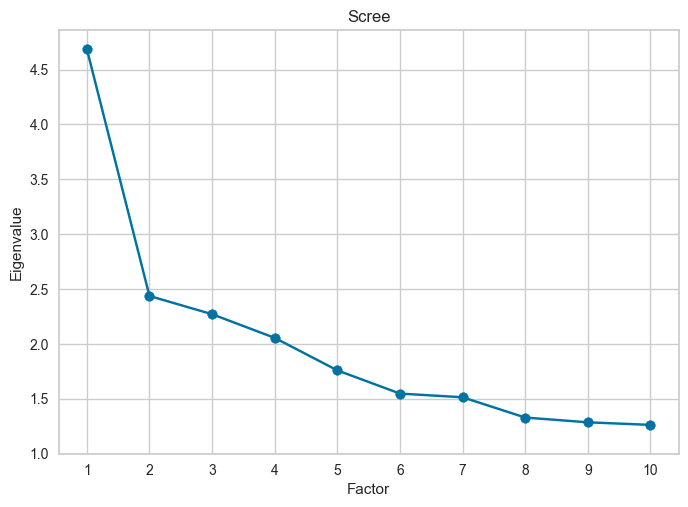

In [11]:
# Create a scree plot to visualize the explained variance by each principal component
# The plot helps to decide how many principal components to keep

# Plot the explained variance values for each of the 10 principal components as a line plot
plt.plot(range(10), pca.explained_variance_)

# Add scatter points on the line plot for better visualization
plt.scatter(range(10), pca.explained_variance_)

# Set the title of the plot to 'Scree'
plt.title('Scree')

# Label the x-axis as 'Factor'
plt.xlabel('Factor')

# Set the x-axis tick labels, starting from 1 up to 10 (corresponding to PC_1 to PC_10)
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])

# Set the y-axis tick labels
plt.yticks([4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0], [4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0])

# Label the y-axis as 'Eigenvalue'
plt.ylabel('Eigenvalue')

In [12]:
# Perform Principal Component Analysis (PCA) on the standardized DataFrame
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Transform the scaled data to the new lower-dimensional representation
# The transformed data is stored in a new DataFrame
df_pca_standard = pd.DataFrame(pca.transform(df_scaled))

# Retrieve the loadings (components) for each principal component
# These loadings indicate how each feature in the original data contributes to the principal components
components = pca.components_

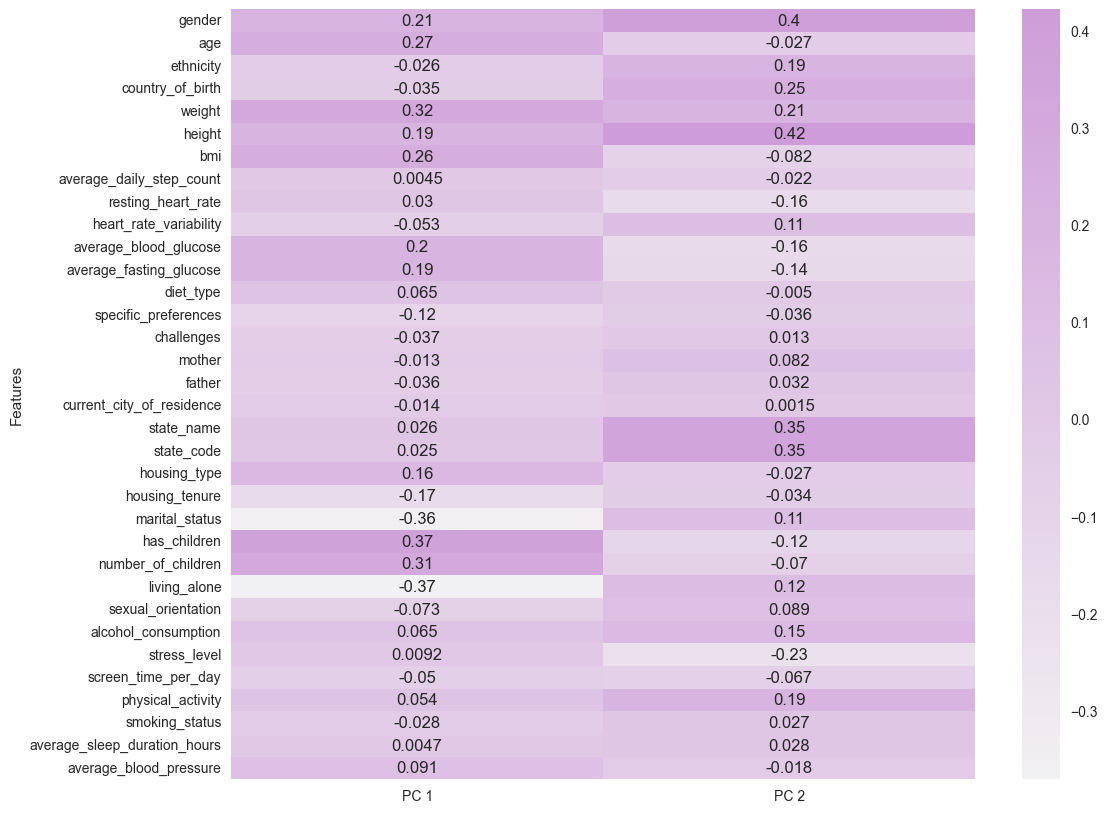

In [13]:
# Explore the correlations between the PCA dimensions and the scaled numerical features

# Get the number of original features that were input into PCA
num_pc = pca.n_features_in_

# Create a list of strings representing the names of the principal components ("PC 1", "PC 2", ...)
pc_list = ["PC "+str(i) for i in list(range(1, num_pc+1))]

# Create a DataFrame to store the component loadings
# The columns of the DataFrame correspond to the principal components, and the rows correspond to the original features
df_heatmap = pd.DataFrame.from_dict(dict(zip(pc_list, components)))

# Add a 'Features' column containing the names of the original features
df_heatmap['Features'] = df_scaled.columns.values

# Set 'Features' as the index for easier interpretation
df_heatmap = df_heatmap.set_index('Features')

# Initialize the plot with a specific figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Define a light color palette for the heatmap
light_pal = sns.light_palette('#CE9DD9', input='rgb', as_cmap=True)

# Create a heatmap using Seaborn to visualize the component loadings
# Annotations are added to each cell for better understanding
ax = sns.heatmap(df_heatmap, annot=True, cmap=light_pal)

# Display the heatmap
plt.show()


In [14]:
# Calculate and display the explained variance for each principal component
# The explained variance ratio indicates the proportion of the dataset's total variance that is 'explained' by each component

# Store the explained variance ratio for each principal component in a variable
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
print(f'Explained Variance of each component: {explained_variance}')

# Calculate the cumulative explained variance
# This shows how much of the dataset's total variance is explained as you add each additional principal component

# Use NumPy's cumsum function to calculate the cumulative sum of the explained variance ratios
cumulative_variance = np.cumsum(explained_variance)

# Print the cumulative explained variance
print(f'Cumulative Explained Variance: {cumulative_variance}')


Explained Variance of each component: [0.13738061 0.07143792]
Cumulative Explained Variance: [0.13738061 0.20881852]


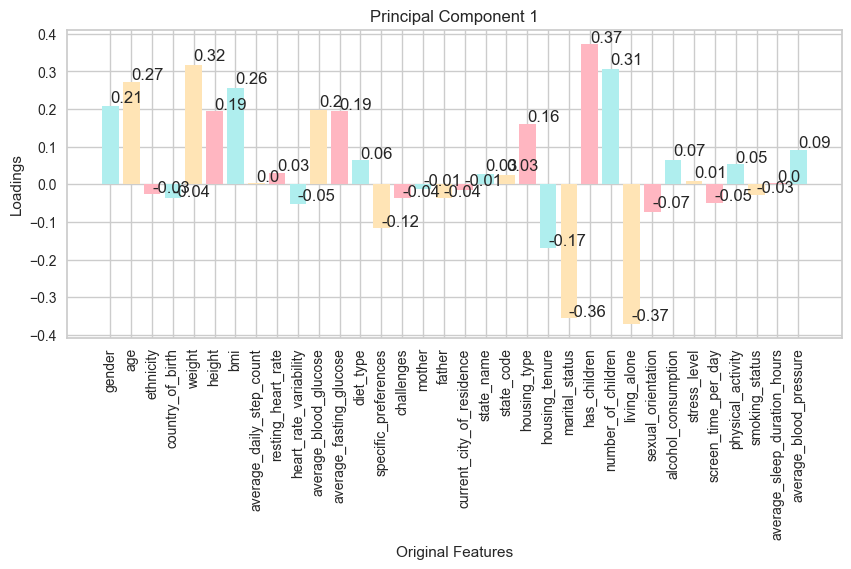

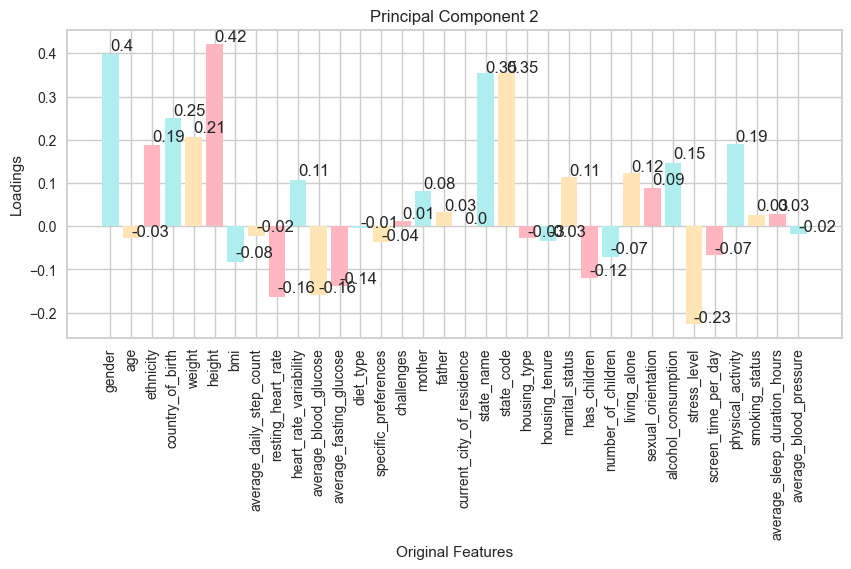

In [15]:
# Setup a pastel color palette for the bar charts
pastel_colors = ['paleturquoise', 'moccasin', 'lightpink']

# Get the number of principal components and the original feature names
n_pcs = pca.n_components_
features = df.columns

# Loop through each principal component to create individual bar charts
for i in range(n_pcs):
    # Initialize a new figure for each principal component
    plt.figure(figsize=(10, 4))

    # Create a bar chart showing how much each original feature contributes to the principal component
    # The heights of the bars represent the component loadings
    bars = plt.bar(features, components[i], color=pastel_colors)

    # Add numerical labels above each bar to indicate its height (loading value)
    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom')  # va: vertical alignment

    # Set the title and axis labels
    plt.title(f'Principal Component {i+1}')
    plt.xlabel('Original Features')
    plt.ylabel('Loadings')
    
    # Rotate x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()


Y-Axis: Shows the "loadings," which are the coefficients of each original feature in the principal component. Loadings can range from -1 to +1.

Remember that the loadings are coefficients that convert original feature values to a new coordinate system defined by the principal components. The signs help in interpreting the orientation and relationship of the original features in this new space.

### PCA for dimensionality reduction

In [16]:
# Perform PCA transformation and create a DataFrame with the reduced principal components

# Apply PCA transformation to the scaled data
# This generates a NumPy array of the data projected onto the first 'n' principal components (in this case, 5)
principalComponents_reduced = pca.fit_transform(df_scaled)

# Create a new DataFrame from the NumPy array of reduced principal components
# The columns are named 'PC1', 'PC2', 'PC3', 'PC4', and 'PC5' representing the first five principal components
df_reduced = pd.DataFrame(data=principalComponents_reduced, columns=['PC1', 'PC2'])

# Show the DataFrame with the reduced components
df_reduced

,PC1,PC2
0,-1.605449,-2.390051
1,-0.826339,-1.676032
2,-3.553596,-0.819030
3,0.812236,-2.760468
4,0.866948,-1.849663
...,...,...
292,0.942350,-1.298449
293,-2.745577,0.848330
294,-1.118534,-1.910288
295,-1.975178,-1.495595


# PCA Exercise
## Now it's your turn

### Create a subset of the ''descriptives" dataset based on the results shown in the correlation matrix
### Run your own PCA analysis on the given subset following the presented steps.

# Classification

#### Two quick facts about KNN 

- KNN classifies x based on most probable class. Most probable is based on most common (see picture below).
- One essential decision to make when constructing a KNN classifier is to choose the number of n-neigbours (Ks)

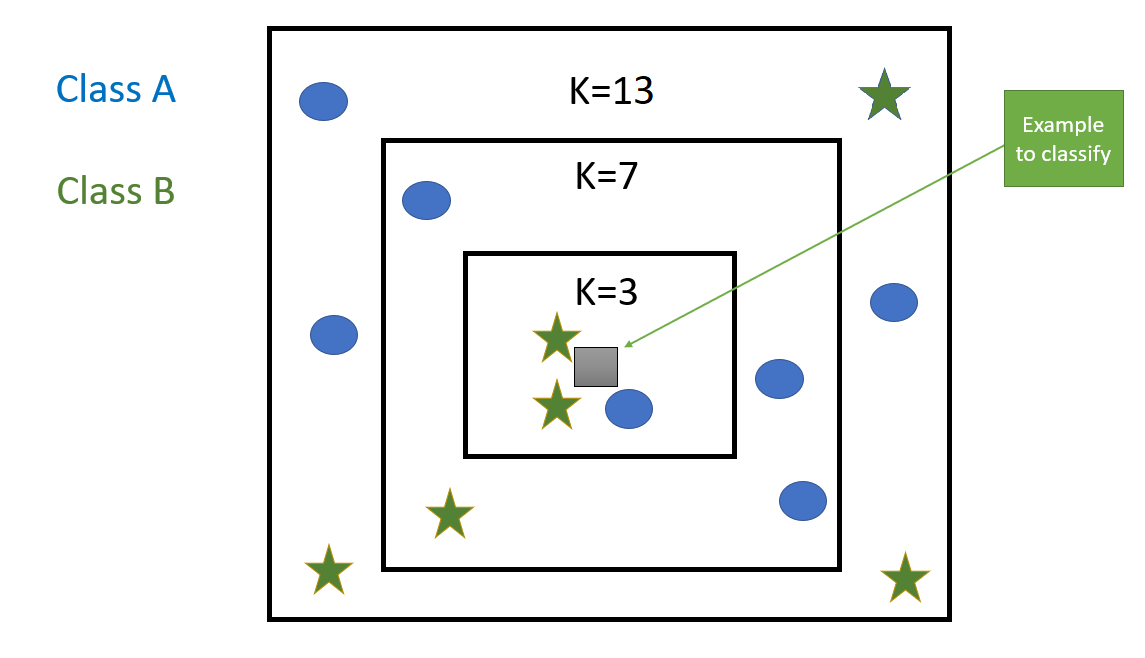

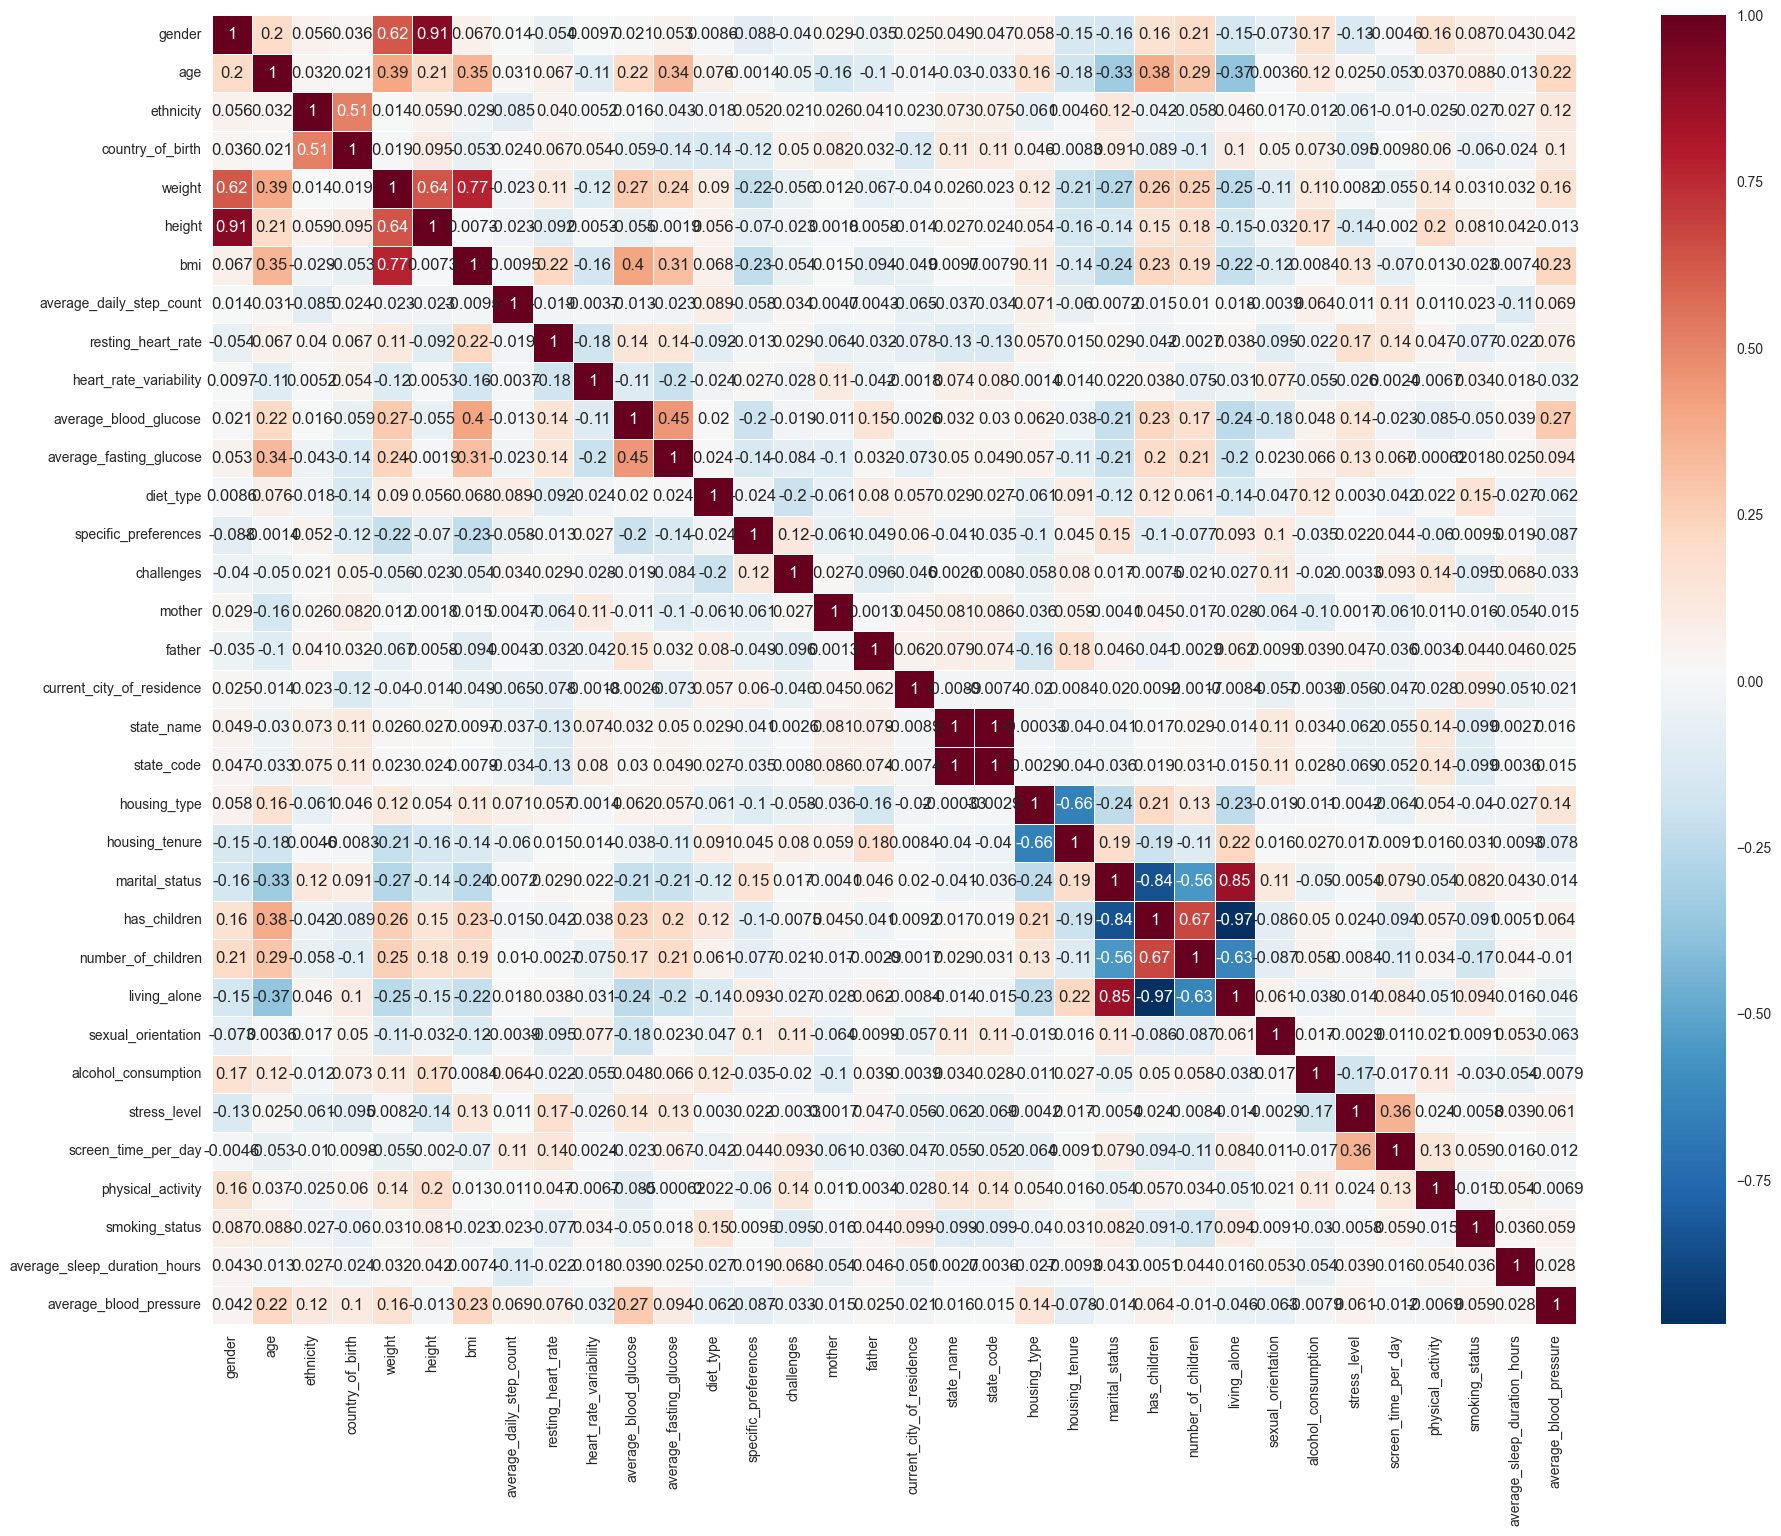

In [17]:
# Compute the pairwise Pearson correlation matrix for df.
# The Pearson correlation coefficient measures the linear relationship between two variables.
# Its value ranges from -1 to 1, where:
# - 1 implies a perfect positive linear relationship,
# - -1 implies a perfect negative linear relationship, and
# - 0 implies no linear relationship.
corr = df.corr(method='pearson')

# Create a new figure and axis with a specified size.
# Adjust the figsize values to change the size of each cell in the heatmap.
fig, ax = plt.subplots(figsize=(22, 17))

# Create a heatmap using Seaborn.
# - `corr`: The computed correlation matrix.
# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

# Display the plot.
plt.show()


In [18]:
# Select specific columns from the DataFrame to create the feature matrix (X) and target vector (y)

# Create feature matrix (X) by selecting certain columns from the original DataFrame
# The chosen columns are assumed to be the independent variables for modeling
X = df[['screen_time_per_day', 'resting_heart_rate', 'average_blood_glucose', 
        'average_fasting_glucose', 'living_alone', 'marital_status', 'bmi']].values

# Create target vector (y) by selecting the 'stress_level' column from the DataFrame
# This is the dependent variable we are interested in predicting or analyzing
y = df['stress_level'].values


In [19]:
# Standardize the feature matrix (X) using StandardScaler
# This scales the features to have mean=0 and variance=1, which is often a good practice before applying machine learning algorithms

X = StandardScaler().fit_transform(X)

In [20]:
X

array([[ 1.44646895,  1.13578141, -0.05298029, ...,  1.1411948 ,
         0.99342697,  0.44018561],
       [-0.00488672, -1.02657166, -0.16457708, ..., -0.87627458,
        -0.61009374, -0.6259773 ],
       [ 1.44646895, -0.3057873 , -0.16457708, ...,  1.1411948 ,
         0.99342697, -0.26294692],
       ...,
       [-0.00488672, -0.48598339, -1.05735138, ..., -0.87627458,
         1.79518732, -0.96225807],
       [-1.45624239,  1.49617358,  0.28181007, ...,  1.1411948 ,
         0.99342697, -0.26294692],
       [-0.00488672,  1.85656576, -0.49936744, ..., -0.87627458,
        -0.61009374, -0.26294692]])

In [21]:
y

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0.

### Split the data in training and test sample

In [22]:
# Split the standardized feature matrix (X) and target vector (y) into training and testing sets

# X_train and y_train will be used for training the model
# X_test and y_test will be used for evaluating the model's performance
# 80% of the data will be used for training, and 20% for testing
# The random_state is set to 0 to ensure reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

How does the X_train look like:

In [23]:
X_train

array([[-0.00488672, -1.02657166,  1.50937473, ...,  1.1411948 ,
         0.99342697, -0.26294692],
       [-1.45624239, -1.20676774, -0.94575459, ..., -0.87627458,
        -0.61009374, -0.53808573],
       [-1.45624239,  1.13578141,  0.05861649, ..., -0.87627458,
        -0.61009374,  2.54576183],
       ...,
       [-0.00488672, -1.02657166,  1.17458437, ..., -0.87627458,
        -0.61009374,  1.81205832],
       [ 1.44646895,  0.23480096, -0.38777065, ..., -0.87627458,
        -0.61009374, -0.53808573],
       [-1.45624239, -0.3057873 , -0.05298029, ...,  1.1411948 ,
         0.99342697, -0.26294692]])

What does the y_test look like

In [24]:
y_test

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1.])

Determine the optimal number of neighbors (`k`) for a k-NN classifier using cross-validation on the training dataset.

In [25]:
# Initialize an empty list to store cross-validation scores for each value of k.
cv_scores = []

# Loop over potential values of k (from 1 to 30).
for k in range(1, 10):
    # Set up the k-NN classifier with the current value of k.
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation on the training data.
    # `cross_val_score` will train and test the model 5 times on different subsets of the data,
    # returning accuracy scores for each of the 5 runs.
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    
    # Append the average accuracy score for the current value of k to the `cv_scores` list.
    cv_scores.append(scores.mean())

# Determine the value of k that gave the highest average cross-validation score.
optimal_k = np.argmax(cv_scores) + 1

# Print out the optimal value of k.
print("The optimal number of neighbors is %d" % optimal_k)


The optimal number of neighbors is 7


### Create the model, fit it on the data and test performance

In [26]:
# Setting up the k-NN classifier with a chosen value for k, which is 5 in this case.
model_KNN = KNeighborsClassifier(n_neighbors=7)

# Train the model using the standardized training data (`X_train_std`) and the training labels (`y_train`).
# The k-NN algorithm will use this training data to make predictions for unseen data based on the 'neighborhood' of data points.
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
# evaluate the performance of the classifier using the accuracy score
accuracy_test = round(model_KNN.score(X_test, y_test),4)
accuracy_test

0.6

#### Confusion Matrix

In [28]:
# Using the trained k-NN model to predict the class labels for the standardized test dataset.
y_pred = model_KNN.predict(X_test)

# Generate the confusion matrix using the true test set labels (`y_test`) and the predicted labels (`y_pred`).
# A confusion matrix provides a summary of the prediction results in a classification problem.
# The number of correct and incorrect predictions are summarized by class and can be used to evaluate the performance of a classification algorithm.
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the resulting confusion matrix.
print(cf_matrix)


[[15  8]
 [16 21]]


<AxesSubplot: >

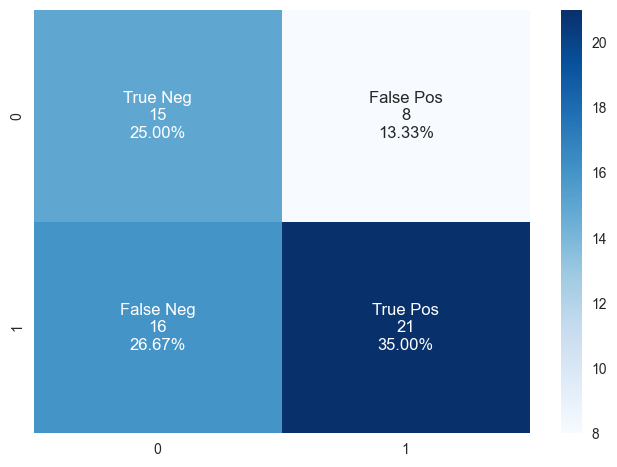

In [29]:
# Define names for each group in the confusion matrix.
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Convert the raw count values in the confusion matrix into a flat list of string-formatted numbers.
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

# Calculate and convert the percentages for each group in the confusion matrix into a flat list of percentages.
# The percentage is calculated by dividing each value in the confusion matrix by the sum of all values in the matrix.
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Combine the names, counts, and percentages for each group into multi-line labels.
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Convert the flat list of labels into a 2x2 array that matches the shape of the confusion matrix.
labels = np.asarray(labels).reshape(2,2)

# Plot the confusion matrix using Seaborn's heatmap function.
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')


# Classification Exercise
## Now it's your turn

Run the You've learned how to perform PCA for dimensionality reduction. Now, let's apply KNN classification on the reduced dataset and explore how it performs. Fokus on 'stress_level' as the dependent variable

### Exercise 1
create independent variable (X), dependent variable (y). Split it into test and train. Use the reduced dataset.


### Exercise 2 
Determine the optimal number of neighbors (k) for the kNN Model.


### Exercise 3
In Exercise 1, you selected a dependent variable and independent variables. Now you'll apply this knowledge to create your own K-Nearest Neighbors (KNN) classification model using those selected variables.

### Exercise 4
compare the results from the knn on the 'descriptives' dataset and the reduced dataset. How has the dimensionality reduction changed the KNN classification results.

# Clustering

## KMEANS CLUSTERING

**Why do you cluster**:
Clustering is a method of unsupervised learning, meaning it **allows for ignorance of true labels**. There are many different algorithms for clustering data but today we will show how to apply `kMeans`. 
Cluster analysis works to perform taxanomy description. This means that you find natural groups within the data not based on the variables, but based on the characteristica the data units share

**How K-Means clustering works**:
- You select the number of clusters that you want to identify in your data. This is the K in K-Means clustering
- The centroid seeds for each cluster is randomly created based on random datapoints from the data. If you choose to create 3 clusters (K=3), 3 random centroid seeds will initially be created
- The distance is measured between the first datapoint and the three initial clusters. 
- The first datapoint is assigned to the nearest cluster
- Now we do the same thing for the next datapoint and continue this process until we have assigned all datapoints
- Then the mean of each cluster is calculated
- Then we measure and cluster again, but this time using the mean values as the centroid seeds
- The quality of the clusters are assessed by adding up the variation within each cluster. 
- KMeans keep track of the total variance within each cluster. 
- Then KMeans creates 3 new random centroid seeds based on random datapoints from the data. Calculate the mean of each cluster, reclusters based on the new mean etc.
- KMeans does this as many times as you tell it to. 

- **A video explaining K-means clustering:** https://www.youtube.com/watch?v=4b5d3muPQmA


In [30]:
# Selecting the numerical values we want to scale
# Here, all columns from the DataFrame are selected for scaling
column_list = df.columns.tolist()

# Initialize the StandardScaler object
# StandardScaler standardizes the dataset by transforming it to have mean=0 and variance=1
scaler = StandardScaler()

# Fit and transform the data using the scaler
# The fit_transform method computes the mean and std deviation for each feature,
# then transforms the data into a standardized form
df_scaled = scaler.fit_transform(df)

# Convert the scaled NumPy array back to a DataFrame
# The column names are retained from the original DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=column_list)

# Display the DataFrame with scaled features
df_scaled

,gender,age,ethnicity,country_of_birth,weight,height,bmi,average_daily_step_count,resting_heart_rate,heart_rate_variability,...,number_of_children,living_alone,sexual_orientation,alcohol_consumption,stress_level,screen_time_per_day,physical_activity,smoking_status,average_sleep_duration_hours,average_blood_pressure
0,-0.950708,1.072028,-1.159263,-1.452173,-0.118282,-0.669736,0.440186,0.276544,1.135781,-1.458221,...,-2.071168e+00,1.141195,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,0.004019,1.974136
1,-0.950708,-0.729931,-0.547571,-0.924859,-0.868279,-0.669736,-0.625977,-0.107627,-1.026572,-0.165024,...,-6.568752e-01,-0.876275,0.110341,-0.359552,0.931625,-0.004887,-0.186663,-0.082339,-0.739258,-0.539555
2,-0.950708,-1.284381,0.879711,0.369459,-0.618280,-0.669736,-0.262947,0.269011,-0.305787,-1.070262,...,-2.071168e+00,1.141195,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,-0.739258,-0.539555
3,-0.950708,1.072028,0.227239,-0.157855,-0.618280,-1.331011,0.317902,0.306675,-0.666179,0.481574,...,7.574173e-01,-0.876275,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,0.004019,1.974136
4,-0.950708,-0.314095,-1.363160,-1.595986,-0.618280,-1.331011,0.321723,0.269011,1.856566,0.352255,...,7.574173e-01,-0.876275,0.110341,-0.359552,0.931625,1.446469,-0.186663,-0.082339,-1.707770,-0.539555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-0.950708,1.072028,-1.648616,1.615839,-0.268282,-0.669736,0.207082,0.295376,-1.026572,0.869533,...,7.574173e-01,-0.876275,0.110341,-0.359552,-1.073394,-1.456242,-0.186663,-0.082339,0.229255,-0.539555
293,-0.950708,-0.729931,-1.200042,1.567902,-0.618280,-0.669736,-0.262947,-0.359975,-0.305787,0.093615,...,-3.140360e-16,1.141195,2.224608,-0.359552,0.931625,1.446469,-0.186663,-0.082339,0.874930,-0.539555
294,-0.950708,-0.314095,-0.833027,-1.116609,-1.118278,-0.669736,-0.962258,0.284077,-0.485983,1.128173,...,7.574173e-01,-0.876275,0.110341,-0.359552,0.931625,-0.004887,-0.186663,-0.082339,1.197767,-0.539555
295,-0.950708,-0.729931,0.064121,-0.349606,-0.618280,-0.669736,-0.262947,-1.422096,1.496174,-1.199581,...,-3.140360e-16,1.141195,0.110341,-0.359552,-1.073394,-1.456242,-0.186663,-0.082339,-0.739258,-0.539555


### ElbowVisualizer

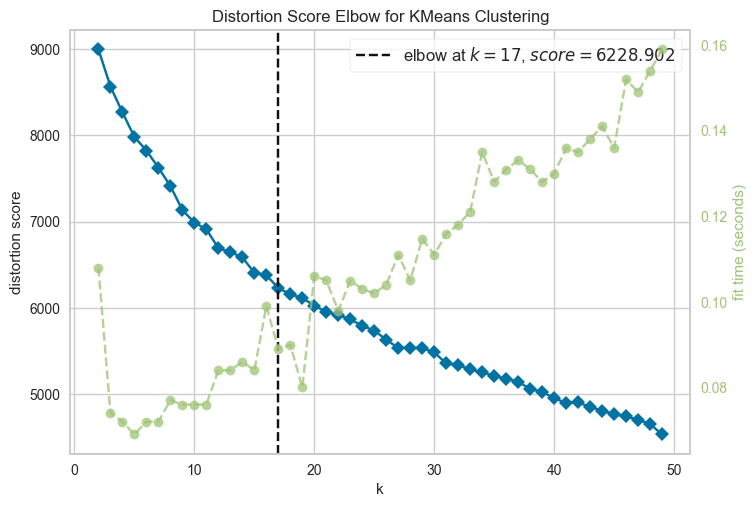

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=49, n_init=10, random_state=4),
                 k=(2, 50))

In [31]:
## Using the ElbowVisualizer to detect the optimal number of clusters for our KMeans implementation
## Documentation: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4, n_init=10), df_scaled, k=(2,50))  

### Running the kMeans clustering model

C:\Users\nped\Anaconda3\envs\FridayFun\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


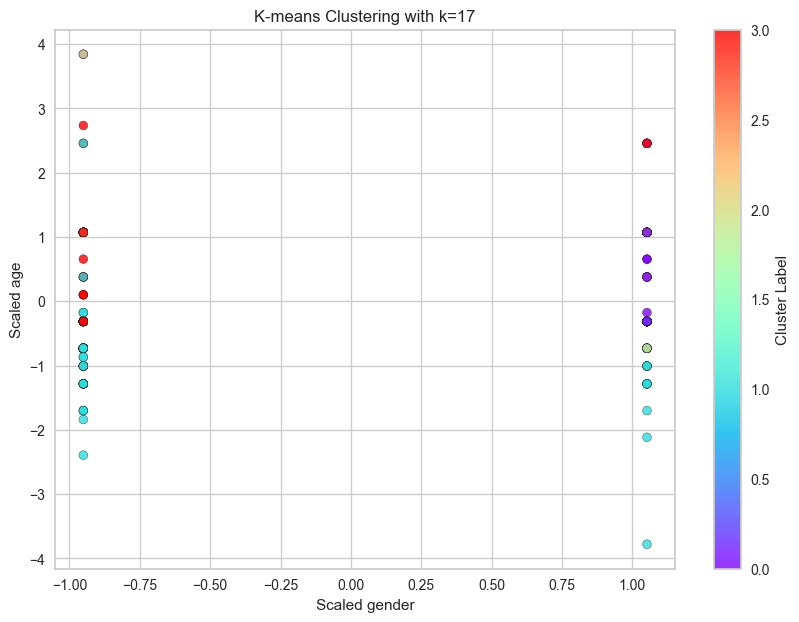

In [32]:
# Import required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize K-means algorithm with 4 clusters
# This initializes a KMeans object that will segment the data into 17 clusters
kmeans = KMeans(n_clusters=4)

# Fit the K-means algorithm to the scaled data
# The fit method computes centroids of 4 clusters in the scaled feature space
kmeans.fit(df_scaled)

# Retrieve the cluster labels
# After fitting, each instance in df_scaled is assigned to one of the 17 clusters
labels = kmeans.labels_

# Shift labels to range from 1 to 4 instead of 0 to 16
# This is a straightforward adjustment to make the cluster labels more human-readable
shifted_labels = labels + 1

# Add the cluster labels to the DataFrame
# Here, we add a new column to df_scaled, populating it with the shifted cluster labels
df_scaled['KMeans_Clusters'] = shifted_labels.astype(int)

# Create a 2D scatter plot to visualize the clustering
# We use the first and second features (columns) in df_scaled for the x and y coordinates of each point
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=40, alpha=0.8)

# Adding titles and labels
plt.title("K-means Clustering with k=17")
plt.xlabel("Scaled " + df_scaled.columns[0])  # Taking the name of the first original feature for the x-axis
plt.ylabel("Scaled " + df_scaled.columns[1])  # Taking the name of the second original feature for the y-axis

# Show color bar representing the cluster
plt.colorbar(label='Cluster Label')

# Display the plot
plt.show()


C:\Users\nped\Anaconda3\envs\FridayFun\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nped\Anaconda3\envs\FridayFun\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


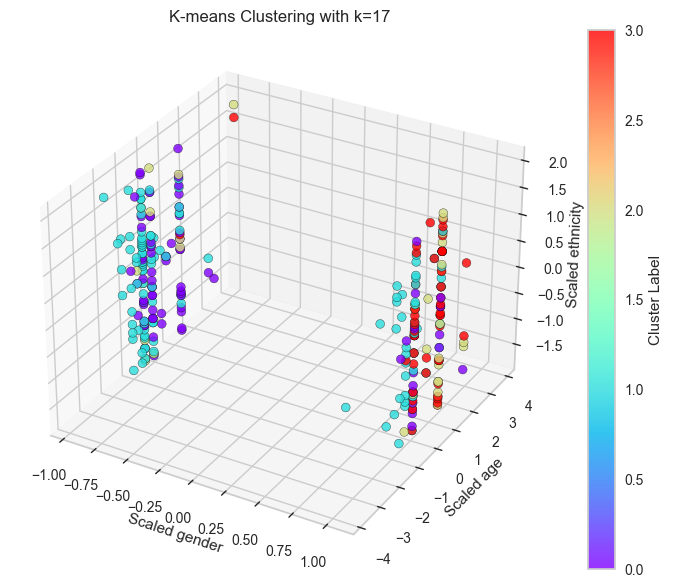

In [33]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D

# Initialize K-means with 4 clusters
kmeans = KMeans(n_clusters=4)
# Fit the model to the scaled DataFrame
kmeans.fit(df_scaled)

# Retrieve cluster labels
labels = kmeans.labels_
# Shift the labels to start from 1 instead of 0
shifted_labels = labels + 1

# Add cluster labels to the DataFrame
df_scaled['KMeans_Clusters'] = shifted_labels.astype(int)

# Get cluster labels by fitting K-means to the original DataFrame
# Note that it is generally not recommended to run K-means on non-scaled data
feature_clusters = kmeans.fit_predict(df)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using first three features for the x, y, and z-axis
sc = ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 2], 
                c=labels, cmap='rainbow', edgecolor='k', s=40, alpha=0.8)

# Add titles and labels
plt.title("K-means Clustering with k=17")
ax.set_xlabel("Scaled " + df.columns[0])
ax.set_ylabel("Scaled " + df.columns[1])
ax.set_zlabel("Scaled " + df.columns[2])

# Add a color bar
plt.colorbar(sc, label='Cluster Label')

# Show the plot
plt.show()

### The silhouette score

The silhouette coefficient measures how well a datapoint fits into its assigned cluster based on two factors:
- How close the datapoint is to the other points in the cluster
- How far the datapoint is from points in other clusters

<AxesSubplot: xlabel='KMeans_Clusters', ylabel='count'>

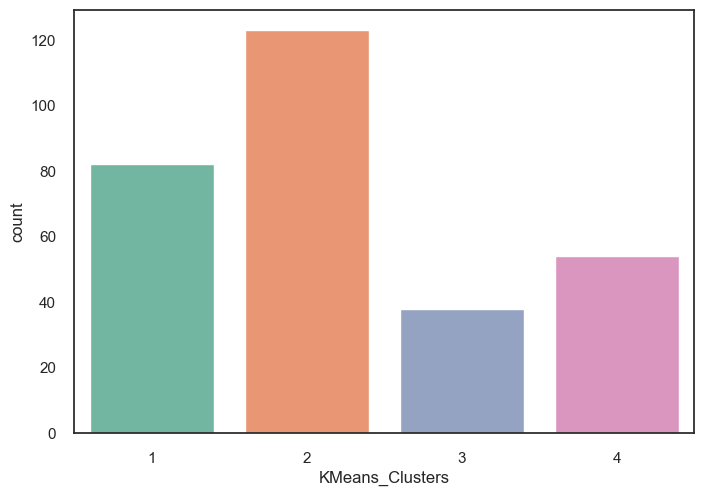

In [34]:
# Exploring the distribution of the clusters:

# Define a color palette for the visualization.
current_palette = sns.color_palette("Set2")

# Set the overall aesthetics for the plot.
sns.set_theme(style='white')

# Create a count plot (a histogram across a categorical variable) using Seaborn.
# This visualization helps in understanding the distribution of data points across the clusters, indicating whether some clusters have more data points than others.
sns.countplot(x=df_scaled["KMeans_Clusters"], palette=current_palette)


In [35]:
# Print the silhouette score for the clusters:
# The silhouette score measures the quality of the clusters that have been computed.
# - A higher silhouette score indicates that the data points in the clusters are closer to each other 
#   and farther from points in other clusters.
# - The score ranges from -1 to 1. A value close to 1 indicates that the clusters are well apart 
#   from each other and clearly distinguished, a value close to 0 indicates overlapping clusters,
#   and a value close to -1 indicates that data points have been assigned to the wrong clusters.
feature_clusters = kmeans.fit_predict(df_scaled)
print(f'Silhouette Score(n=17): {silhouette_score(df_scaled, feature_clusters)}')


Silhouette Score(n=17): 0.09951020356762791


C:\Users\nped\Anaconda3\envs\FridayFun\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Davies–Bouldin index: 
The average similarity ratio of each cluster with its most similar cluster. Zero is the lowest possible score and indicates better clustering.

In [36]:
from sklearn.metrics import davies_bouldin_score
print("Davies–Bouldin index:", davies_bouldin_score(df_scaled, labels))

Davies–Bouldin index: 2.6904380835926336


# Now lets try Clustering with the reduced (Through PCA) dataset

# Clustering Exercise
## Now it's your turn

You've learned how to perform PCA for dimensionality reduction. Now, let's apply K-means clustering on the reduced dataset and explore how it performs.
Use the dataset that has been reduced through PCA and

### Exercise 1
Find the optimal number of clusters (k) for a K-means clustering algorithm using the reduced dataset.

### Exercise 2 
In Exercise 1, you determined the optimal number of clusters for K-means clustering on a reduced dataset. Now, it's time to actually create the clusters and visualize them.
#### Perform Clustering: Apply K-means clustering on the reduced dataset.

#### Visualization: Visualize the clusters in 2D space using the first two principal components. Optionally, also create a 3D visualization using the first three principal components.

### Exercise 3
After visualizing the clusters from your reduced dataset, the next critical step is to evaluate the quality of these clusters quantitatively. In this exercise, you will focus on three metrics: the F-value and the Silhouette Score.

#### Silhouette Score: 
Calculate the Silhouette Score of your clustering. The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.

#### Davies–Bouldin
Calculate the Davies-Bouldin score of your clustering. The value measures the distance between all clusters